<a href="https://colab.research.google.com/github/Mohanlakshmi1205/Mohan-Lakshmi/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.isnull().sum()   #checking the null values

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [ ]:
df.value_counts()

,,,,,,count
Date,SPX,GLD,USO,SLV,EUR/USD,
9/9/2015,1942.040039,106.129997,14.520000,13.930000,1.122070,1
1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100,1
9/7/2010,1091.839966,122.699997,32.770000,19.360001,1.267797,1
9/6/2017,2465.540039,126.809998,10.040000,16.870001,1.192777,1
9/6/2016,2186.479980,128.710007,10.390000,19.049999,1.125366,1
...,...,...,...,...,...,...
1/10/2018,2748.229980,125.029999,12.680000,16.020000,1.192933,1
1/10/2017,2268.899902,113.150002,11.070000,15.910000,1.058862,1
1/10/2014,1842.369995,120.260002,33.189999,19.379999,1.360711,1


In [ ]:
df["GLD"].value_counts()

,count
GLD,
115.940002,5
126.300003,4
122.209999,4
124.589996,4
117.959999,4
...,...
125.000000,1
125.129997,1
90.080002,1


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
# if we are working on regression problem we have to check the correaltion. which column will corelated to which column
# correlation is divided into 2 types
# 1. positive --> If one variable is increase the other variable will increase @ directly proportional
# 2. Negative --> If one varaible is increase the other variable will increase @ inversely proportional

In [ ]:
import os,sys
from scipy import stats

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
correlation = df.corr()

In [ ]:
# Creating a heat map for better understanding of correlation

<Axes: >

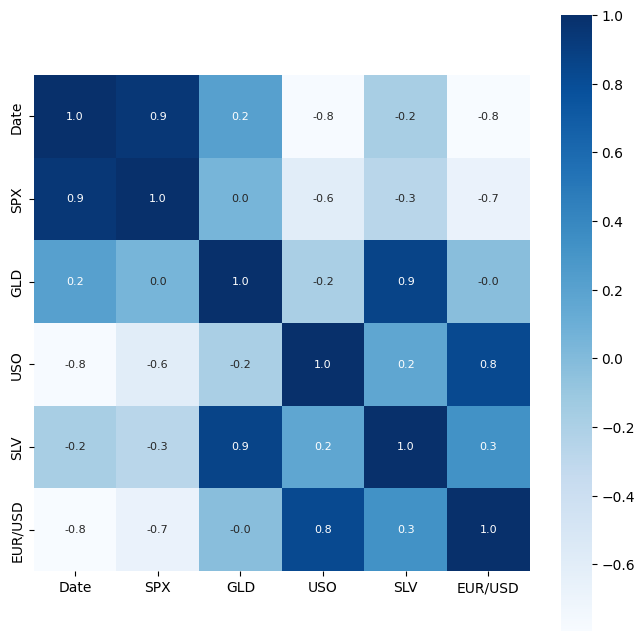

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f',annot = True, annot_kws = {'size' : 8} , cmap='Blues' )

In [ ]:
# correlation values for GLD
print(correlation["GLD"])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [ ]:
# checking the distributions of GLD Values

<ipython-input-20-ab7f811b2df6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"], color = "red")


<Axes: xlabel='GLD', ylabel='Density'>

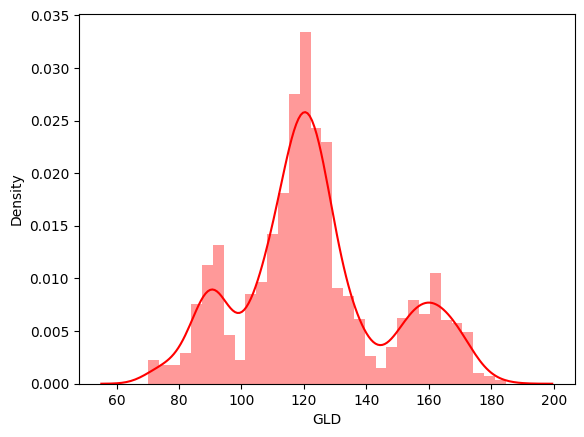

In [ ]:
sns.distplot(df["GLD"], color = "red")

In [ ]:
# splitting the features and targets

In [ ]:
X = df.drop(["Date","GLD"], axis = 1)
Y = df["GLD"]

In [ ]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 30)

In [ ]:
RF = RandomForestRegressor(n_estimators=100)

In [ ]:
RF.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# Model evaluation

In [ ]:
X_train_prediction = RF.predict(X_train)


In [ ]:
print(X_train_prediction)

[116.90170201 159.72689612 135.53379873 ... 112.71780184 110.16939887
 119.93079955]


In [ ]:
# for test data we will do prediction

X_test_prediction = RF.predict(X_test)
print(X_test_prediction)

[ 97.85059966  93.67189957 123.21270022 114.15629989 139.65970097
 124.53680026 124.79130124 123.74880011  84.09989898 118.77410061
 127.07179961 121.419799   151.55130195 113.90299936 119.88700045
 172.30220094 114.18140018 124.32469967 164.24230232 169.84569844
 119.91490002 126.27310021 121.17570064 148.64270198 121.91360063
 108.93800023 110.47390019 171.88509933 126.62730113 114.71600111
 128.05009548 127.1229998  122.2585991   92.98370119 115.74959947
 121.7206001  124.25039954 118.98249903 116.04220026 112.47120035
 101.66279819 121.43870054 146.71069727 154.41730222 115.21069916
 123.00790101 124.54949949 155.62500418 135.00400131  93.50319885
  75.07200032  86.13069918 127.83429951 154.11530119 132.22420317
 126.01850019 127.02819786 122.42409998 171.39639961 157.13920005
 126.02450115  91.91939938 115.38960027 113.58069961 165.83940148
 170.1357005  119.88999999 160.94009999  87.22949979 127.86019689
 164.42010205 108.81669969 123.40399903 120.46590066 113.59829949
  91.43919

In [ ]:
# R sqaure error
error = metrics.r2_score(Y_test, X_test_prediction)
print(error)

0.986593580190385


In [ ]:
error1 = metrics.r2_score(Y_train,X_train_prediction)
print(error1)

0.9985254888136472


In [ ]:
# Compare the actual valu e and predicted value in a plot

In [ ]:
Y_test = list(Y_test)


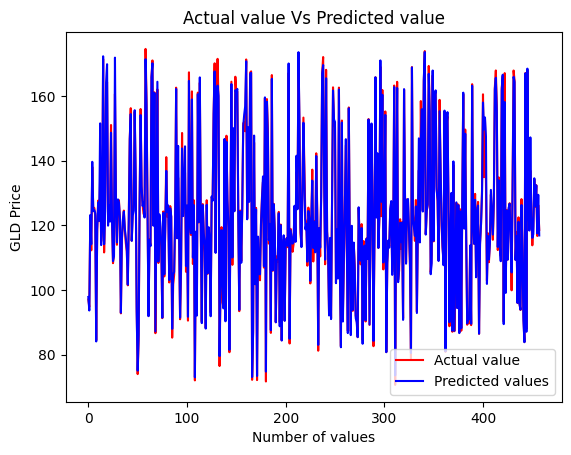

In [ ]:
plt.plot(Y_test,color="red",label = "Actual value")
plt.plot(X_test_prediction, color = "blue", label = "Predicted values")
plt.title("Actual value Vs Predicted value")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()